In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

F:\anaconda python\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train=pd.read_csv(r'F:\mine\titanic\train_tit.csv')
test=pd.read_csv(r'F:\mine\titanic\titanic_test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

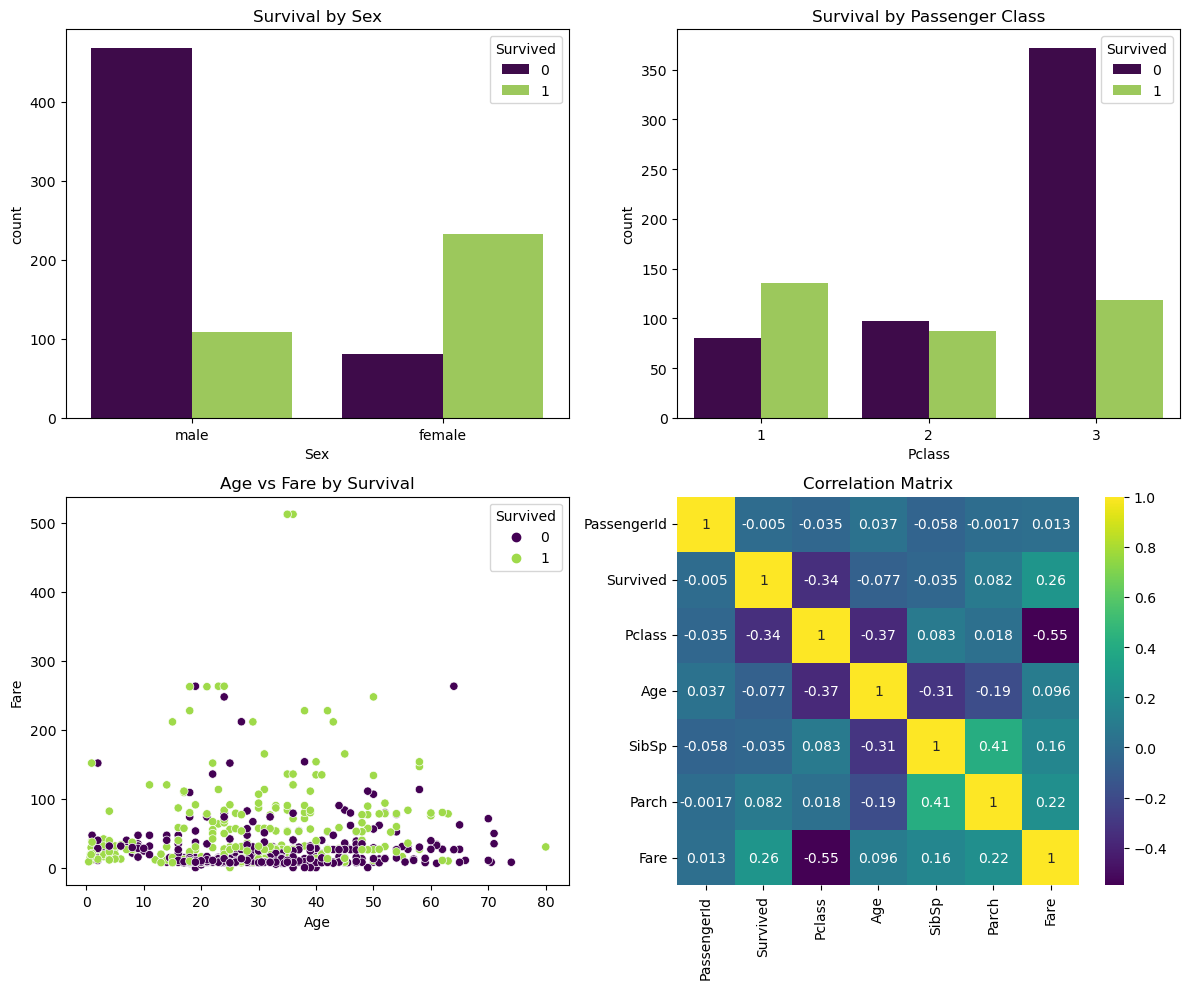

In [7]:
# Define the number of rows and columns in your grid
num_rows = 2
num_cols = 2
viridis_colors = ["#440154", "#9FDA4A"] 

# Create the figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

sns.countplot(x='Sex', hue='Survived', data=train, ax=axes[0, 0], palette=viridis_colors)
axes[0, 0].set_title("Survival by Sex")

sns.countplot(x='Pclass', hue='Survived', data=train, ax=axes[0, 1], palette=viridis_colors)
axes[0, 1].set_title("Survival by Passenger Class")

sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train, ax=axes[1, 0], palette=viridis_colors)
axes[1, 0].set_title("Age vs Fare by Survival")

corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='viridis', ax=axes[1, 1])
axes[1, 1].set_title("Correlation Matrix")

plt.tight_layout() # Automatically adjusts the spacing between subplots
plt.show()

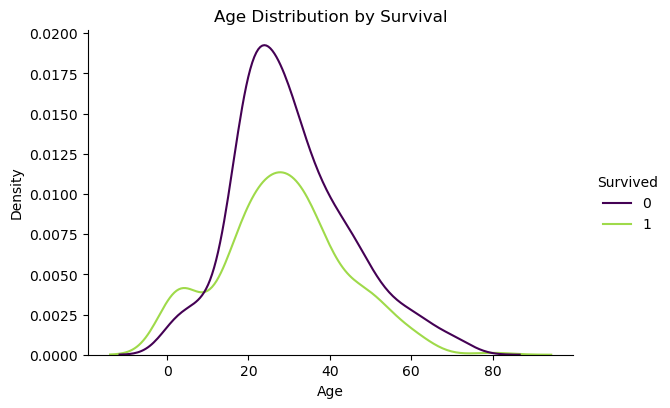

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.displot(data=train, x='Age', hue='Survived', kind='kde', height=4, aspect=1.5, palette=viridis_colors)
plt.title('Age Distribution by Survival')
plt.show()

In [9]:
test = test.drop(columns = ['Cabin','Name',"Age","Ticket"])

#train["Cabin"].fillna(train["Cabin"].mean(),inplace=True)
train = train.drop(columns = ['Cabin','Name',"Age","Ticket"])


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex']  = le.fit_transform(train['Sex'])
test['Sex']  = le.fit_transform(test['Sex'])
train["Embarked"]=le.fit_transform(train["Embarked"])
test["Embarked"]=le.fit_transform(test["Embarked"])


<Axes: >

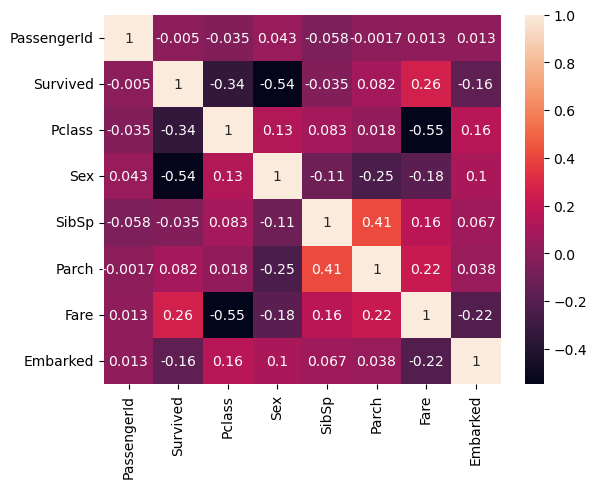

In [12]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True)

In [13]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

In [14]:
X = pd.concat([train.iloc[:,:1],train.iloc[:,2:]],axis=1)
y = train.iloc[:,1]


In [15]:
X

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,3,1,1,0,7.2500,2
1,2,1,0,1,0,71.2833,0
2,3,3,0,0,0,7.9250,2
3,4,1,0,1,0,53.1000,2
4,5,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,887,2,1,0,0,13.0000,2
887,888,1,0,0,0,30.0000,2
888,889,3,0,1,2,23.4500,2
889,890,1,1,0,0,30.0000,0


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
param_dist = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}
lr = DecisionTreeClassifier()
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, 
                                   n_iter=8, cv=8, random_state=42)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=8, estimator=DecisionTreeClassifier(), n_iter=8,
                   param_distributions={'max_depth': (1, 20),
                                        'min_samples_leaf': (1, 20),
                                        'min_samples_split': (2, 20)},
                   random_state=42)

In [17]:
best_params_random = random_search.best_params_
print(f"Best Parameters (Random Search): {best_params_random}")

Best Parameters (Random Search): {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 20}


In [18]:
y_pred_lr = random_search.predict(X_test)

In [30]:
results = []
acc = accuracy_score(y_pred_lr,y_test)
f1 = f1_score(y_pred_lr,y_test)
recall = recall_score(y_pred_lr,y_test)
precision = precision_score(y_pred_lr,y_test)
results.append({
    'f1': round(f1,4)*100,
    'recall': round(recall,4)*100,
    'precision': round(precision,4)*100,
    'acc':round(acc,4)*100
    
})

In [31]:
results_df = pd.DataFrame(results)
print(results_df)

      f1  recall  precision    acc
0  73.91   79.69      68.92  79.89


In [21]:
X_test = test
test_pred = random_search.predict(X_test)
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [22]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
trainX,testX,trainy,testy = train_test_split(X,y,test_size=0.2, random_state=42)
model = RandomForestClassifier(
    n_estimators=50, max_features='log2', 
    max_depth=9, 
    max_leaf_nodes=9
)
model.fit(trainX, trainy)

y_pred = model.predict(testX)
print("Random forest classification report")
print(classification_report(y_pred, testy))


Random forest classification report
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       125
           1       0.61      0.83      0.70        54

    accuracy                           0.79       179
   macro avg       0.76      0.80      0.77       179
weighted avg       0.82      0.79      0.80       179

